In [569]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import numpy

In [570]:
bed_file_path="../../data/r64089e.sorted.vcf.bed"
col_names=["chromosome", "len", "type"]
data = pd.read_csv(bed_file_path, sep='\t', header=None, usecols=[0,3,4], names=col_names)

### Distribution by chromosome:

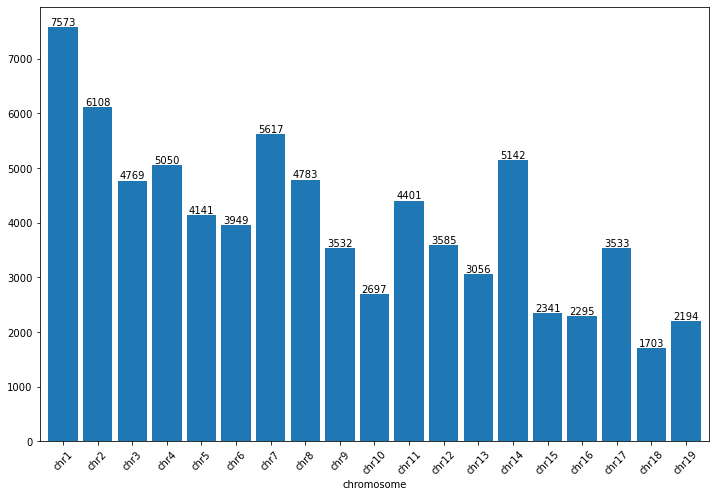

In [571]:
plot_data=data.groupby("chromosome").size().sort_index(key=lambda x: x.map(lambda v: int(v[3:])))
ax = plot_data.plot.bar(figsize=(12,8), width=0.85, rot=45)
ax = ax.bar_label(ax.containers[0])

### Distriution by chromosome & type:

type,DEL,DEL/INV,DUP,INS,INV,INVDUP
chromosome,,,,,,
chr1,3659.0,74.0,11.0,3806.0,23.0,0.0
chr2,2817.0,45.0,6.0,3221.0,19.0,0.0
chr3,2401.0,30.0,3.0,2323.0,11.0,1.0
chr4,2447.0,36.0,6.0,2550.0,11.0,0.0
chr5,1980.0,25.0,3.0,2120.0,13.0,0.0
chr6,1900.0,31.0,5.0,2003.0,10.0,0.0
chr7,2611.0,48.0,6.0,2931.0,21.0,0.0
chr8,2430.0,42.0,6.0,2288.0,16.0,1.0
chr9,1691.0,35.0,5.0,1792.0,9.0,0.0


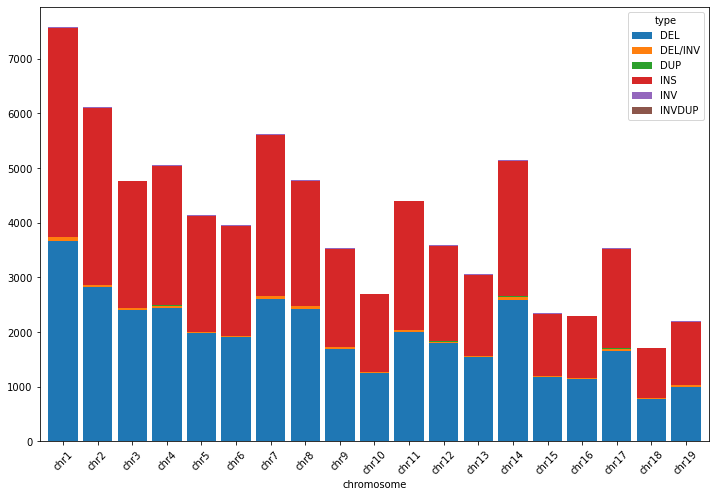

In [572]:
plot_data=data.groupby(["chromosome","type"])["chromosome"].size().unstack("type").fillna(0).sort_index(key=lambda x: x.map(lambda v: int(v[3:])))
ax = plot_data.plot.bar(figsize=(12,8), width=0.85, stacked=True, rot=45)
# for c in ax.containers:
#     ax.bar_label(c, label_type='center')
plot_data

### Distribution by size (variable ranges):

In [573]:
grouped_data=data.groupby(["len","type"])["len"].count().unstack("type").fillna(0)
grouped_data["sum"] = grouped_data.sum(axis=1)
# grouped_data

In [574]:
min_count=1000
min_distance=100

size_data = pd.DataFrame(columns=('DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP','sum'))

distance=1

start=str(data.min()["len"])
end=str(data.min()["len"])
final=str(data.max()["len"])

row_data=pd.Series([0,0,0,0,0,0,0], index=['DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP', 'sum'])

for row in grouped_data.iterrows():
    count=row_data["sum"]
    values=row[1]
    end=str(row[0])
    
    row_data+=values
    
    if distance>=min_distance and count>= min_count:
        size_data.loc[start+"-"+end] = row_data
        distance=1
        start=end
        row_data=pd.Series([0,0,0,0,0,0,0], index=['DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP', 'sum'])
    else:
        distance+=1

size_data.loc[start+"-"+final] = row_data
        
size_data

,DEL,DEL/INV,DUP,INS,INV,INVDUP,sum
31-130,20317.0,7.0,1.0,22941.0,1.0,0.0,43267.0
130-230,5129.0,27.0,5.0,5808.0,11.0,0.0,10980.0
230-330,1433.0,45.0,1.0,1844.0,8.0,0.0,3331.0
330-430,1165.0,54.0,0.0,1315.0,10.0,1.0,2545.0
430-530,878.0,54.0,4.0,1022.0,9.0,0.0,1967.0
530-630,534.0,50.0,2.0,582.0,7.0,0.0,1175.0
630-741,470.0,55.0,1.0,482.0,7.0,0.0,1015.0
741-883,464.0,62.0,1.0,475.0,8.0,0.0,1010.0
883-1056,459.0,61.0,1.0,474.0,9.0,0.0,1004.0
1056-1285,496.0,65.0,2.0,435.0,10.0,0.0,1008.0


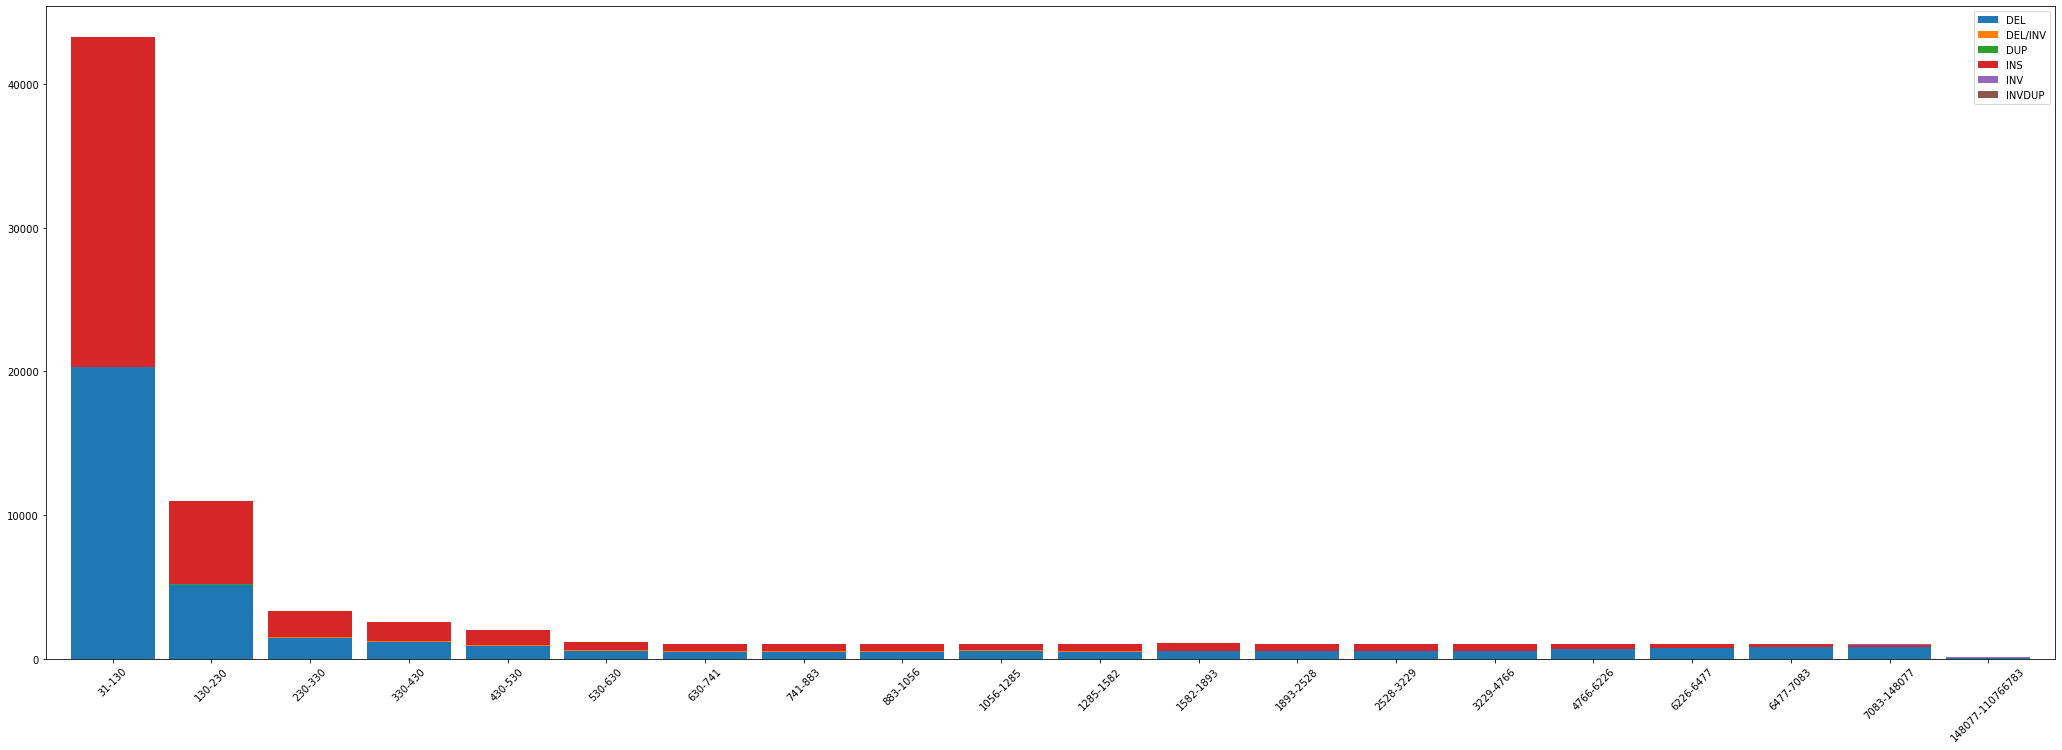

In [575]:
final_size_data=size_data.drop(['sum'], axis=1)
ax = final_size_data.plot.bar(figsize=(36,12), width=0.85, stacked=True, rot=45)